In [17]:
!pip install transformers
import pandas as pd
from transformers import *
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split


In [0]:
df = pd.read_excel('dataset.xlsx')
df.reset_index()
df = df.iloc[:,[2,3,5,8,9,11,12,13]]
df.columns = ["verb_veridial_positive",
              "verb_veridical_negative",
              "semantic_characteristic",
              "standford_signature_for_that",
              "standford_signature_for_to",
              "complementizer",
              "verb_tense",
              "semantic_relation"]
df.dropna(inplace=True, axis = 0, how = 'all')
df.fillna(axis = 0, inplace =True, value="none")

#verb veridical positive cleaning
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '+' if '+' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '-' if '-' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '?' if '?' in x else x)

#verb veridical negative cleaning
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '1' if '1' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '?' if '?' in x else x)

#df.semantic_characteristic.unique() cleaning not needed
#df.standford_signature_for_that.unique() cleaning not needed
#df.standford_signature_for_to.unique() cleaning not needed
#df.complementizer.unique() cleaning not needed

#df.verb_tense cleaning
df.verb_tense = df.verb_tense.apply(lambda x: 'present' if 'present' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'past' if 'past' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'future' if 'future' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'none' if 'none' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: '?' if '?' in x else x)

df = pd.get_dummies(df)

X_train = df.iloc[:,1:-5]
y_train = df.iloc[:,-4:]

In [0]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [0]:
model = tf.keras.Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3), input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(500, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(250, activation='selu'))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ['accuracy'])

In [96]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
#early_stopping_monitor = EarlyStopping(patience=3)
#train model
history = model.fit(X_train, y_train, validation_split=0.4, epochs=30)

Epoch 1/30
42/42 [==============================] - 0s 10ms/step - loss: 0.5354 - accuracy: 0.8368 - val_loss: 0.4839 - val_accuracy: 0.8531
Epoch 2/30
42/42 [==============================] - 0s 8ms/step - loss: 0.4092 - accuracy: 0.8793 - val_loss: 0.4727 - val_accuracy: 0.8724
Epoch 3/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3833 - accuracy: 0.8861 - val_loss: 0.4558 - val_accuracy: 0.8702
Epoch 4/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3629 - accuracy: 0.8876 - val_loss: 0.4438 - val_accuracy: 0.8713
Epoch 5/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3511 - accuracy: 0.8891 - val_loss: 0.4796 - val_accuracy: 0.8588
Epoch 6/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3473 - accuracy: 0.8952 - val_loss: 0.4755 - val_accuracy: 0.8759
Epoch 7/30
42/42 [==============================] - 0s 8ms/step - loss: 0.3398 - accuracy: 0.9021 - val_loss: 0.4734 - val_accuracy: 0.8565
Epoch 8/30
42/42 [=

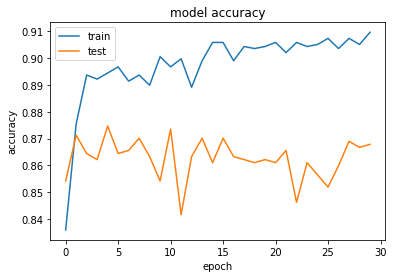

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()